<a href="https://colab.research.google.com/github/engineerinvestor/Finance-Education/blob/main/Finance_Tutorial_The_Merton_Share_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Finance Tutorial: The Merton Share with Python

Name: Engineer Investor [@egr_investor](https://x.com/egr_investor)

Date: 01/05/2024

This tutorial provides an in-depth exploration of the Merton Share, a cornerstone of modern portfolio theory, with practical Python implementations. We'll delve into advanced aspects and practical considerations, going beyond basic calculations.

More information: [Understanding the Merton Share and the Diminishing Marginal Utility of Wealth](https://x.com/egr_investor/status/1875986201787978161)

### 1. Introduction and Motivation

In investing, balancing risk and reward is crucial. The Merton Share offers a valuable framework for determining the optimal allocation of your wealth between risky assets (like stocks) and risk-free assets (like bonds) to maximize your expected utility.

### 2. Theoretical Foundations

The Merton Share (ω) is derived from the Merton model, a continuous-time model of optimal consumption and portfolio choice. It represents the ideal proportion of wealth to allocate to a risky asset.

**Formula:**

ω = (μ - r) / (γσ²)

Where:

*   μ: Expected return of the risky asset
*   r: Risk-free rate of return
*   γ: Investor's coefficient of relative risk aversion (CRRA)
*   σ²: Variance of the risky asset's returns

**Key Assumptions:**

*   **Continuous Trading:** Investors can rebalance portfolios continuously.
*   **Frictionless Markets:** No transaction costs or taxes.
*   **Constant Investment Opportunities:** μ, r, and σ² remain constant.
*   **CRRA Utility:** Investors exhibit constant relative risk aversion.
*   **Financial Wealth Only:**  The model focuses solely on financial wealth.
*   **Lognormal Returns:** Risky asset returns are log-normally distributed.

### 3. Python Implementation: Basic Merton Share Calculation

In [1]:
import numpy as np

def calculate_merton_share(mu, r, gamma, sigma):
  """
  Calculates the Merton Share.

  Args:
    mu: Expected return of the risky asset.
    r: Risk-free rate of return.
    gamma: Coefficient of relative risk aversion.
    sigma: Standard deviation of the risky asset's returns.

  Returns:
    The Merton Share (omega).
  """
  if gamma <= 0 or sigma <= 0:
      raise ValueError("Risk aversion and volatility must be positive.")
  omega = (mu - r) / (gamma * sigma**2)
  return omega

# Example Usage
mu = 0.08  # Expected return of 8%
r = 0.03   # Risk-free rate of 3%
gamma = 2.5  # Risk aversion
sigma = 0.15 # Volatility (standard deviation)

merton_share = calculate_merton_share(mu, r, gamma, sigma)
print(f"Merton Share: {merton_share:.4f}")
print(f"Allocation to Risky Asset: {merton_share * 100:.2f}%")
print(f"Allocation to Risk-Free Asset: {(1 - merton_share) * 100:.2f}%")

Merton Share: 0.8889
Allocation to Risky Asset: 88.89%
Allocation to Risk-Free Asset: 11.11%


### 4. Estimating Inputs from Market Data

Estimating the inputs (μ, r, σ) from real-world data is a significant challenge.

**Risk-free rate (r):**

*   Selecting an appropriate risk-free rate requires careful consideration.
*   Typically, a long-term government bond yield is used.
*   Consider the yield curve and its potential impact on future returns.

**Expected return (μ):**

*   Estimating expected returns is inherently difficult.
*   Historical averages can be used as a starting point, but they may not be reliable predictors of future returns.
*   Other methods include factor models, dividend discount models, and implied volatility.

**Volatility (σ):**

*   Historical volatility can be calculated, but it's important to consider its limitations.
*   **Rolling volatility:** Calculate volatility over a moving window to capture changing market conditions.
*   **GARCH models:** These statistical models provide more sophisticated volatility forecasts.

**Risk aversion (γ):**

*   Determining an individual's risk aversion is subjective.
*   **Questionnaires:** Standardized questionnaires can help assess risk tolerance.
*   **Calibration to observed behavior:** Infer risk aversion from existing portfolios or past investment choices.

**Python Example (using yfinance):**

In [5]:
import yfinance as yf
import pandas as pd

def estimate_inputs(ticker, start_date, end_date, risk_free_rate=0.03):
  """
  Estimates inputs for the Merton Share from historical market data.

  Args:
    ticker: Ticker symbol of the risky asset (e.g., "SPY").
    start_date: Start date for data retrieval (e.g., "2010-01-01").
    end_date: End date for data retrieval (e.g., "2023-12-31").
    risk_free_rate: The risk-free rate (annualized).

  Returns:
    A dictionary containing the estimated mu, r, and sigma.
  """
  # Download historical data
  data = yf.download(ticker, start=start_date, end=end_date)

  # Calculate daily log returns
  data['Log Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

  # Annualize the mean of log returns
  mu = data['Log Returns'].mean() * 252  # Assuming 252 trading days

  # Annualize the standard deviation of log returns
  sigma = data['Log Returns'].std() * np.sqrt(252)

  return {"mu": mu, "r": risk_free_rate, "sigma": sigma}

# Example Usage
ticker = "SPY"  # S&P 500 ETF
start_date = "2013-01-01"
end_date = "2023-12-31"

estimated_inputs = estimate_inputs(ticker, start_date, end_date)
print(f'\nestimated_inputs: {estimated_inputs}')

# Now, use these estimated inputs in the calculate_merton_share function:
gamma = 3  # Example risk aversion
merton_share = calculate_merton_share(estimated_inputs["mu"],
                                     estimated_inputs["r"],
                                     gamma,
                                     estimated_inputs["sigma"])
print(f"Merton Share (using estimated inputs): {merton_share:.4f}")

[*********************100%***********************]  1 of 1 completed


estimated_inputs: {'mu': 0.12574662899221375, 'r': 0.03, 'sigma': 0.1708316964528189}
Merton Share (using estimated inputs): 1.0936


### 5. Sensitivity Analysis and Visualization

Understanding how the Merton Share changes with different input values is crucial.

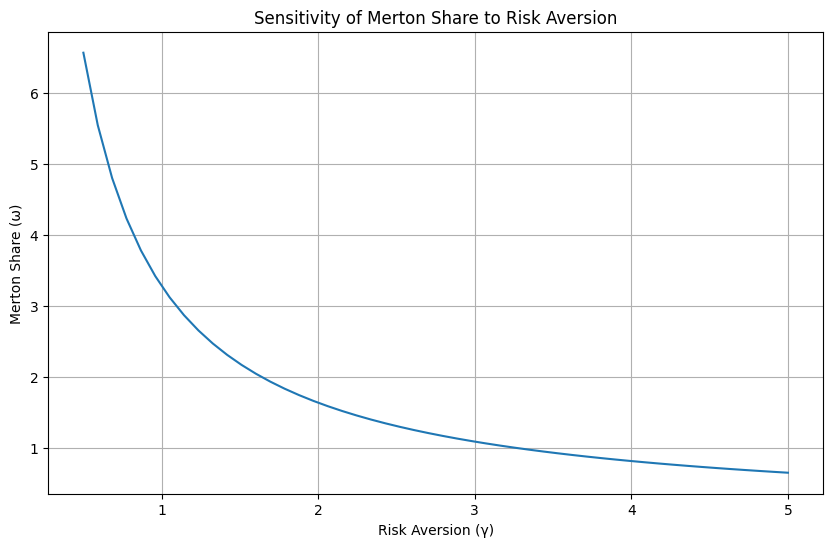

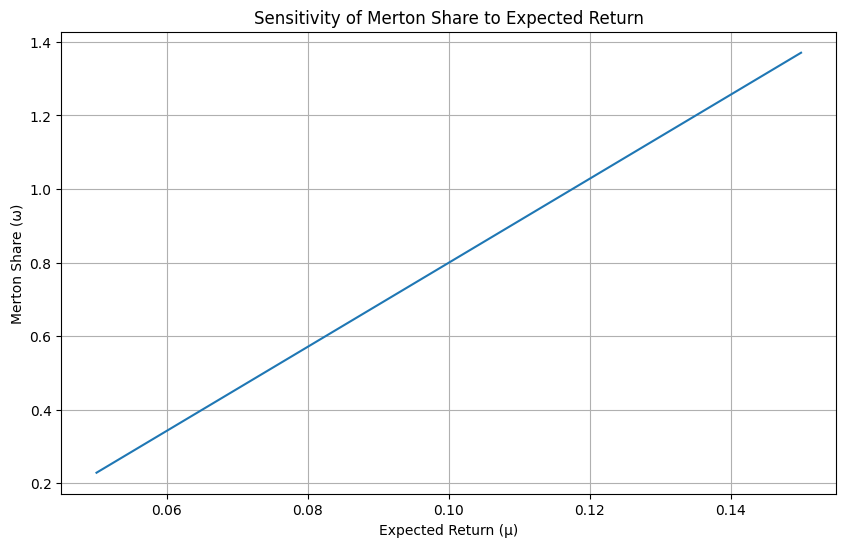

In [3]:
import matplotlib.pyplot as plt

def sensitivity_analysis(mu, r, sigma, gamma_range):
  """
  Performs sensitivity analysis of the Merton Share to changes in risk aversion.

  Args:
    mu: Expected return of the risky asset.
    r: Risk-free rate of return.
    sigma: Standard deviation of the risky asset's returns.
    gamma_range: A list or array of risk aversion coefficients.

  Returns:
    A list of Merton Shares corresponding to the gamma_range.
  """
  merton_shares = []
  for gamma in gamma_range:
    merton_shares.append(calculate_merton_share(mu, r, gamma, sigma))
  return merton_shares

# Example Usage
gamma_values = np.linspace(0.5, 5, 50)  # Range of risk aversion values
merton_shares = sensitivity_analysis(estimated_inputs["mu"],
                                   estimated_inputs["r"],
                                   estimated_inputs["sigma"],
                                   gamma_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, merton_shares)
plt.xlabel("Risk Aversion (γ)")
plt.ylabel("Merton Share (ω)")
plt.title("Sensitivity of Merton Share to Risk Aversion")
plt.grid(True)
plt.show()

# Sensitivity to other parameters
# You can do a similar analysis for mu and sigma. For example, varying mu:
mu_values = np.linspace(0.05, 0.15, 50)
gamma = 3
merton_shares = []
for mu in mu_values:
    merton_shares.append(calculate_merton_share(mu, estimated_inputs["r"], gamma, estimated_inputs["sigma"]))

plt.figure(figsize=(10, 6))
plt.plot(mu_values, merton_shares)
plt.xlabel("Expected Return (μ)")
plt.ylabel("Merton Share (ω)")
plt.title("Sensitivity of Merton Share to Expected Return")
plt.grid(True)
plt.show()

### 6. Addressing Practical Constraints

**Leverage and Short-Selling:**

*   The Merton Share can sometimes suggest leverage (ω > 1) or short-selling (ω < 0).
*   These strategies may not be feasible or desirable for all investors due to risk and constraints.

**Transaction Costs:**

*   Frequent trading to rebalance a portfolio incurs transaction costs, which can significantly impact returns.
*   Consider the trade-off between rebalancing frequency and transaction costs.

**Rebalancing:**

*   Rebalancing is necessary to maintain the desired asset allocation as market values change.
*   Determine an appropriate rebalancing frequency (e.g., monthly, quarterly, annually) based on your risk tolerance and transaction costs.


### 7. Advanced Topics (Optional)

**Dynamic Programming:**

*   For a more realistic approach, explore how dynamic programming can be used to solve the Merton model in discrete time, allowing for time-varying parameters and constraints.

**Multiple Risky Assets:**

*   Extend the Merton Share calculation to a portfolio with multiple risky assets.
*   This involves using covariance matrices and more complex optimization techniques.

### 8. Conclusion and Further Exploration

The Merton Share provides a valuable framework for understanding optimal portfolio allocation, despite its simplifying assumptions. This tutorial has equipped you with the tools to implement and analyze the Merton Share in Python.

**Further Exploration:**

*   Explore more advanced models that incorporate time-varying parameters, transaction costs, and non-normal returns.
*   Investigate the impact of human capital and labor income on optimal portfolio choice.
*   Consider the role of behavioral biases in investment decision-making.


This enhanced tutorial provides a more comprehensive and in-depth exploration of the Merton Share, addressing key theoretical concepts, practical considerations, and advanced topics. Remember that this is a starting point for your journey into the fascinating world of portfolio optimization!